In [4]:
import pandas as pd 
import nltk 

column_names = ["id","tag","short_desc","long_desc","effort(s)"]

In [7]:
df_1 = pd.read_csv("data_collection/raw_data/APC/APC_lab_raw.csv",names = column_names) 
df_2 = pd.read_csv("data_collection/raw_data/JRA/JRA_lab_raw.csv", names = column_names) 
df_3 = pd.read_csv("data_collection/raw_data/MDL/MDL_lab_raw.csv", names = column_names) 
df_4 = pd.read_csv("data_collection/raw_data/OLS/OLS_lab_raw.csv", names = column_names) 
df_5 = pd.read_csv("data_collection/raw_data/XWK/XWK_lab_raw.csv", names = column_names) 

In [12]:
all_raw_df = pd.concat([df_1,df_2,df_3,df_4,df_5])
all_raw_df = all_raw_df.dropna(subset = ['effort(s)']) 
all_raw_df.head()

,id,tag,short_desc,long_desc,effort(s)
0,13532566,ZOOKEEPER,Upgrade `cyclonedx-maven-plugin` to 2.7.6,NaN,4800
1,13532323,ZOOKEEPER,Improve SuppressWarnings in KeeperException,NaN,1800
2,13528994,ZOOKEEPER,FileSnap.deserialize is effectively a static m...,Thus we don't need to do some new FileSnap(nul...,1800
3,13527369,ZOOKEEPER,OpCode.check is treated as a quorum write oper...,NaN,1200
4,13527175,ZOOKEEPER,Fix CI failure and warning,Failure: We need to run apt update before inst...,2400


In [13]:
len(all_raw_df.index)

87986

In [14]:
master_df = pd.DataFrame(columns = ['tag','desc','effort(m)']) 
for index, row in all_raw_df.iterrows(): 
    
    short_desc = str(row['short_desc']) 
    long_desc = str(row['long_desc']) 
    
    if len(long_desc) == 0 and len(short_desc) == 0: 
        continue
    
    if len(long_desc) > len(short_desc): 
        master_df.loc[len(master_df)] = [row['tag'],long_desc,row['effort(s)']] 
        
    else:  
         master_df.loc[len(master_df)] = [row['tag'],short_desc,row['effort(s)']]
        

In [15]:
master_df.head()

,tag,desc,effort(s)
0,ZOOKEEPER,Upgrade `cyclonedx-maven-plugin` to 2.7.6,4800
1,ZOOKEEPER,Improve SuppressWarnings in KeeperException,1800
2,ZOOKEEPER,Thus we don't need to do some new FileSnap(nul...,1800
3,ZOOKEEPER,OpCode.check is treated as a quorum write oper...,1200
4,ZOOKEEPER,Failure: We need to run apt update before inst...,2400


In [16]:
len(master_df.index)

87986

In [27]:
import matplotlib.pyplot as plt 
effort = master_df['effort(s)'].tolist()

print(min(effort)) 
print(max(effort))

6
5184000


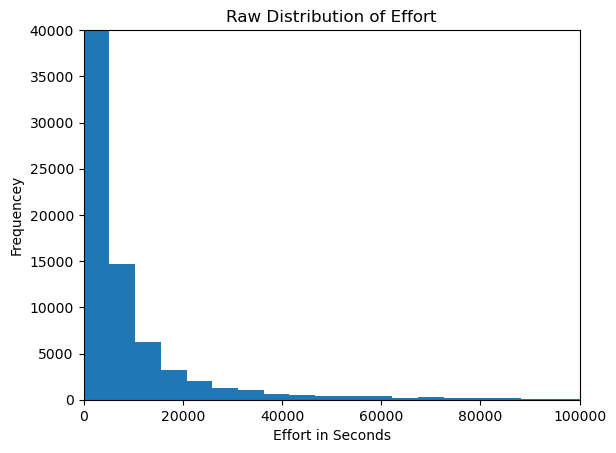

In [42]:
plt.hist(effort,bins=1000)  
plt.xlim(0,100000) 
plt.ylim(0,40000) 
plt.xlabel("Effort in Seconds") 
plt.ylabel("Frequencey") 
plt.title("Raw Distribution of Effort")
plt.show()

Text(0.5, 1.0, 'Natural Log Distribution of Effort')

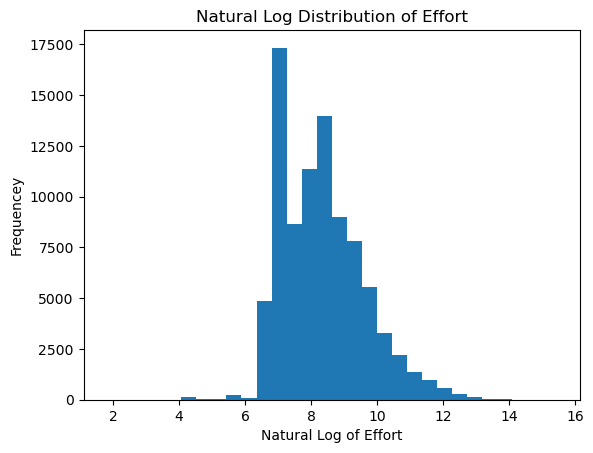

In [52]:
import numpy as np 

log_effort = np.log(effort)
plt.hist(log_effort,bins = 30) 
plt.xlabel('Natural Log of Effort') 
plt.ylabel('Frequencey') 
plt.title('Natural Log Distribution of Effort')

In [62]:
import wordcloud 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jake1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
text = " ".join(desc for desc in master_df.desc) 

raw_text = text.split() 
print(len(raw_text))
cleaned_text = [] 

stop_words = set(stopwords.words('english')) 

for word in raw_text: 
    if word.lower() not in stop_words:  
        cleaned_text.append(word.lower()) 
        
print(len(cleaned_text))

6139802
4190003


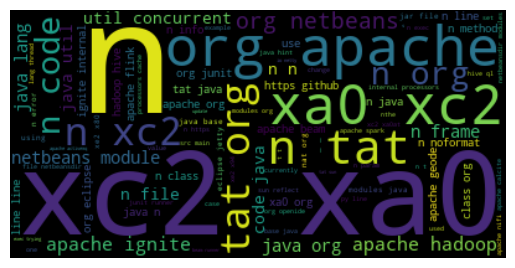

In [65]:
from wordcloud import WordCloud 

wc = WordCloud().generate(' '.join(cleaned_text)) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [66]:
master_df.to_csv('master_dataset.csv')